<a href="https://colab.research.google.com/github/jiteshchandra80/heartdisease/blob/master/Breast_cancer_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all the important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
#importing the datassts
from google.colab import files
uploaded=files.upload()

In [0]:
df=pd.read_csv("data.csv")

In [0]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df.shape

(569, 33)

In [0]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
df=df.dropna(axis=1)

In [0]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df.shape

(569, 32)

In [0]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

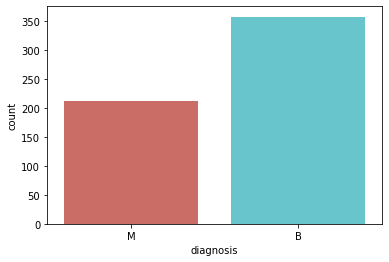

In [0]:
sns.countplot(x="diagnosis",data=df,palette="hls")
plt.show()

In [0]:
# encoding the diagnosis from object to binary
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df.iloc[:,1]=Encoder.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [0]:
#Creating a pair plot for 4 columns
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


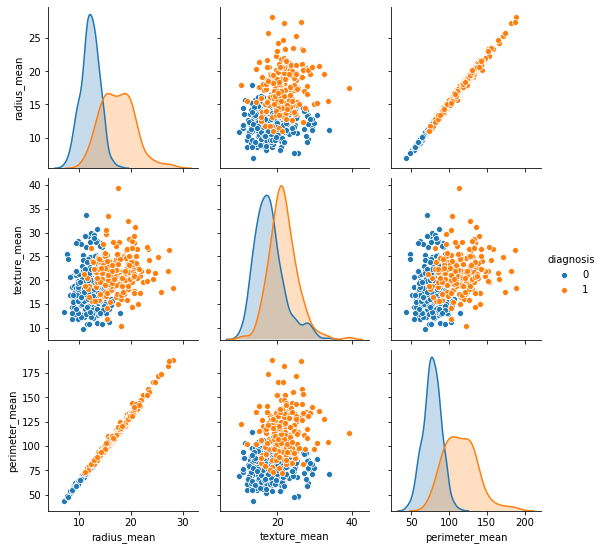

In [0]:
sns.pairplot(df.iloc[:,1:5], hue="diagnosis")

In [0]:
#corelation between the 12 columns
corr=(df.iloc[:,1:12]).corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


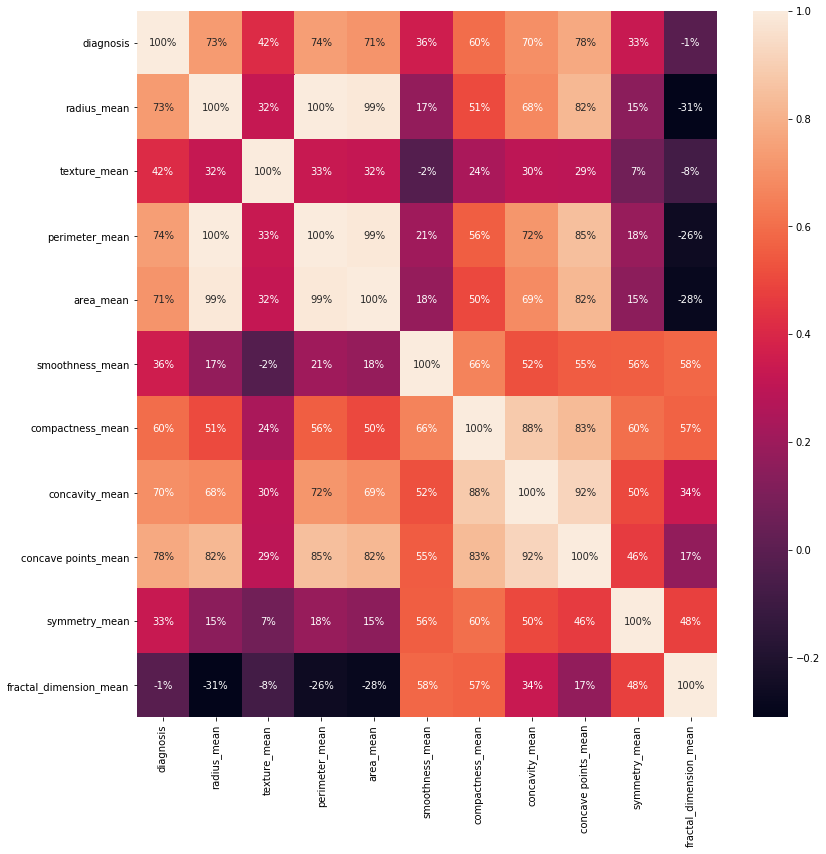

In [0]:
#visualization of the corelation between the items
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True,fmt='.0%') 


In [0]:
df.shape

(569, 32)

In [0]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
x=df.iloc[:,2:33].values
y=df.iloc[:,1].values
type(df)

pandas.core.frame.DataFrame

In [0]:
#Split the data into training and testing data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=0)

In [0]:
#scale the data of x to put into the common value of 0 and 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)
train_x

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [0]:
#now making 3 models to find the accuracy of the system
def models(train_x,train_y):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(train_x,train_y)

  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
  tree.fit(train_x,train_y)

  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
  forest.fit(train_x,train_y)

  #print the model accuracy on the training data
  print("The accuracy of logistic regression is :",log.score(train_x,train_y))
  print("The accuracy of desicion tree is :",log.score(train_x,train_y))
  print("The accuracy of random forest is :",log.score(train_x,train_y))

  return log,tree,forest

In [0]:
#getting all the scores from the 3 algorithms
model=models(train_x,train_y)

The accuracy of logistic regression is : 0.9906103286384976
The accuracy of desicion tree is : 0.9906103286384976
The accuracy of random forest is : 0.9906103286384976


In [0]:
#Now creating the matrix for al the three
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
 print('model',i)  
 cm=confusion_matrix(test_y,model[i].predict(test_x))
 
 tp=cm[0,0]
 tn=cm[0,1]
 fp=cm[1,0]
 fn=cm[1,1]
 print(cm)
 print("Accuracy of the model[i] is :",tp+fn/(tp+tn+fp+fn))
 print()

model 0
[[86  4]
 [ 2 51]]
Accuracy of the model[i] is : 86.35664335664336

model 1
[[85  5]
 [ 3 50]]
Accuracy of the model[i] is : 85.34965034965035

model 2
[[88  2]
 [ 1 52]]
Accuracy of the model[i] is : 88.36363636363636



In [0]:
#another way of getting the accuracy and the presicion report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
 cs=classification_report(test_y,model[i].predict(test_x))
 acc=accuracy_score(test_y,model[i].predict(test_x))
 print(cs)
 print(acc)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98    

In [0]:
pred=model[2].predict(test_x)
print(pred)
print("\n\n")
print(test_y)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]



[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
